In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb

df = pd.read_csv('C:/Users/swapn/OneDrive/Desktop/MSC[CC]/Sem I/DSA/Dataset/automobile.csv')
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# Value Counts
df['drive-wheels'].value_counts()


drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

<Axes: xlabel='price'>

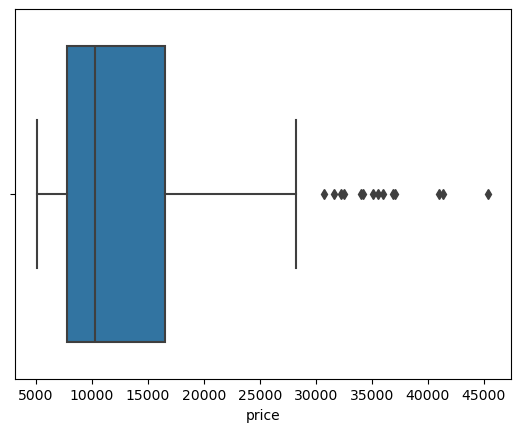

In [5]:
# Box Plot
sb.boxplot(x = df['price'])


<Axes: xlabel='horsepower', ylabel='price'>

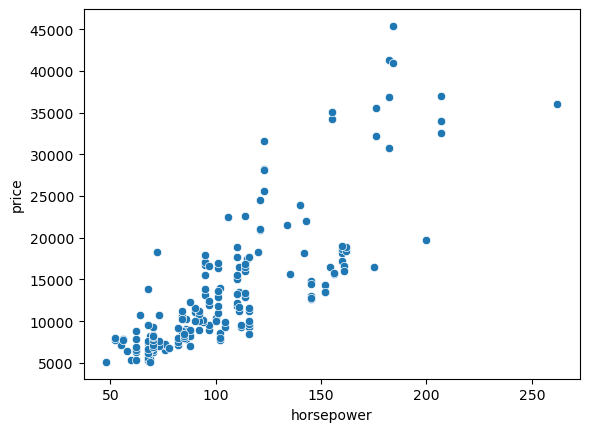

In [6]:
# Scatterplot 
sb.scatterplot(x = df['horsepower'], y = df['price'])

<Axes: xlabel='highway-mpg', ylabel='price'>

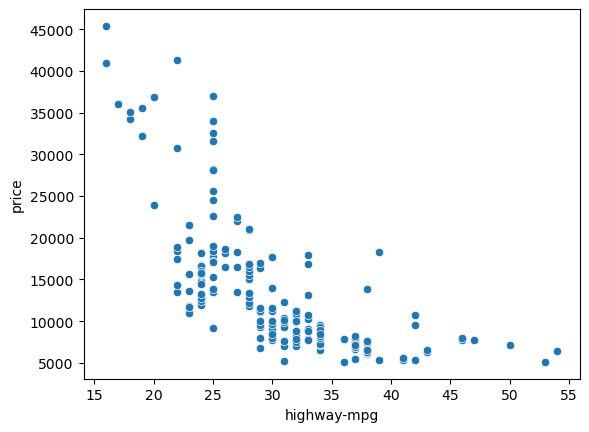

In [7]:
sb.scatterplot(x = df['highway-mpg'], y = df['price'])

In [17]:
# Group By
# Group by 'drive-wheels' and 'body-style' and calculate mean for numeric columns only
df_grp = df.groupby(['drive-wheels', 'body-style'], as_index=False).mean(numeric_only=True)

# Display grouped data
print(df_grp)



   drive-wheels   body-style  symboling  normalized-losses  wheel-base  \
0           4wd    hatchback   2.000000          83.000000   93.300000   
1           4wd        sedan   0.666667         122.666667   97.800000   
2           4wd        wagon   0.000000          85.500000   96.300000   
3           fwd  convertible   3.000000         122.000000   94.500000   
4           fwd      hardtop   2.000000         168.000000   95.100000   
5           fwd    hatchback   1.367347         120.959184   95.063265   
6           fwd        sedan   0.709091         113.272727   97.278182   
7           fwd        wagon   0.083333          99.750000   98.708333   
8           rwd  convertible   2.800000         128.400000   92.340000   
9           rwd      hardtop   1.857143         123.000000   98.985714   
10          rwd    hatchback   2.277778         160.611111   96.566667   
11          rwd        sedan  -0.277778         132.388889  106.300000   
12          rwd        wagon  -0.55555

In [18]:
# Pivot Table 
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot


symboling                                          \
body-style   convertible   hardtop hatchback     sedan     wagon   
drive-wheels                                                       
4wd                  NaN       NaN  2.000000  0.666667  0.000000   
fwd                  3.0  2.000000  1.367347  0.709091  0.083333   
rwd                  2.8  1.857143  2.277778 -0.277778 -0.555556   

             normalized-losses                                              \
body-style         convertible hardtop   hatchback       sedan       wagon   
drive-wheels                                                                 
4wd                        NaN     NaN   83.000000  122.666667   85.500000   
fwd                      122.0   168.0  120.959184  113.272727   99.750000   
rwd                      128.4   123.0  160.611111  132.388889  102.777778   

              ...      diesel                                          \
body-style    ... convertible   hardtop hatchback     sedan     wagon   
drive-wheels  ...                                                       
4wd           ...         NaN       NaN  0.000000  0.000000  0.000000   
fwd           ...         0.0  0.000000  0.020408  0.145455  0.000000   
rwd           ...         0.0  0.142857  0.000000  0.194444  0.333333   

                     gas                                          
body-style   convertible   hardtop hatchback     sedan     wagon  
drive-wheels                                                      
4wd                  NaN       NaN  1.000000  1.000000  1.000000  
fwd                  1.0  1.000000  0.979592  0.854545  1.000000  
rwd                  1.0  0.857143  1.000000  0.805556  0.666667  

[3 rows x 95 columns]

<Axes: xlabel='None-body-style', ylabel='drive-wheels'>

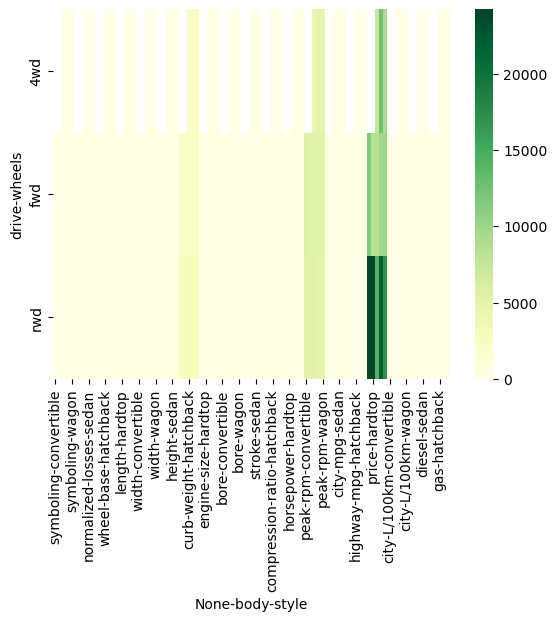

In [19]:
# Heat Map
sb.heatmap(df_pivot, cmap= 'YlGn')
